<a href="https://colab.research.google.com/github/LokeRuiKee/GCNXAI/blob/main/FYP2exp7_GNNExplainer_wip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture

!pip install torch torch-geometric -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install rdkit deepchem
!pip install pandas
!pip install tqdm tabulate

In [ ]:
import pandas as pd
from rdkit import Chem
from torch_geometric.data import Data
import torch
from tqdm import tqdm
from tabulate import tabulate
import deepchem as dc

In [ ]:
def load_dataset(path='cleanData.xlsx'):
    df = pd.read_excel(path)
    df = df.dropna(subset=['SMILES', 'single-class-label'])
    return df

dataset_df = load_dataset()
print(f"Loaded {len(dataset_df)} molecules.")

# transfer to list to make it compatible with featurizer
smiles_list = dataset_df['SMILES'].tolist()
labels = dataset_df['single-class-label'].tolist()

print("5 example of SMILES", smiles_list[:5])
print("Class of the 5 example smiles", labels[:5])

Loaded 4075 molecules.
5 example of SMILES ['CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1', 'O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2', 'COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2', 'CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1', 'CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2']
Class of the 5 example smiles [1, 1, 1, 1, 1]


In [ ]:
# pair SMILES list to corresponding label
valid_data = []
invalid_smiles = []

for smiles, label in tqdm(zip(smiles_list, labels), total=len(smiles_list), desc="Validating and converting SMILES"):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
      valid_data.append((mol, smiles, label))
    else:
      invalid_smiles.append(smiles)

print("\n\nNumber of valid SMILES", len(valid_data))
print("5 example of valid data", valid_data[:5])
print("\nNumber of invalid SMILES:", len(invalid_smiles))
print("5 example of invalid SMILES", invalid_smiles[:5])

# Unzip list to tuple
mol, filtered_smiles_list, filtered_labels = zip(*valid_data)

print("\n5 examples of filtered_smiles_list tuple: ", filtered_smiles_list[:5])
print("corresponding label (in tuple): ", filtered_labels[:5])

Validating and converting SMILES: 100%|██████████| 4075/4075 [00:00<00:00, 5639.84it/s]



Number of valid SMILES 4075
5 example of valid data [(<rdkit.Chem.rdchem.Mol object at 0x795f54edbd80>, 'CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1', 1), (<rdkit.Chem.rdchem.Mol object at 0x795f54ed8900>, 'O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2', 1), (<rdkit.Chem.rdchem.Mol object at 0x795f54edbdf0>, 'COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2', 1), (<rdkit.Chem.rdchem.Mol object at 0x795f54f8e030>, 'CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1', 1), (<rdkit.Chem.rdchem.Mol object at 0x795f54f8e0a0>, 'CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2', 1)]

Number of invalid SMILES: 0
5 example of invalid SMILES []

5 examples of filtered_smiles_list tuple:  ('CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1', 'O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2', 'COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2', 'CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1', 'CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2')
corresponding label (in tuple):  (1, 1, 1, 1, 1)


╒════════════════════════════════════════════════════════════════════╤═════════╤═══════════════╤═══════════════╤═════════════╕
│ SMILES                                                             │   Label │ Formula       │   Mol. Weight │   Num Atoms │
╞════════════════════════════════════════════════════════════════════╪═════════╪═══════════════╪═══════════════╪═════════════╡
│ CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1                                   │       1 │ C12H19N2O2+   │        223.3  │          16 │
├────────────────────────────────────────────────────────────────────┼─────────┼───────────────┼───────────────┼─────────────┤
│ O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2                    │       1 │ C24H32ClN3OS2 │        478.13 │          31 │
├────────────────────────────────────────────────────────────────────┼─────────┼───────────────┼───────────────┼─────────────┤
│ COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2 │       1 │ C33H40ClN3O3  │        562.15 

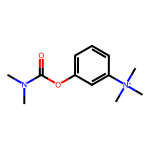

Molecule 2


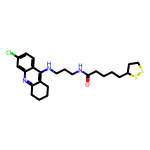

Molecule 3


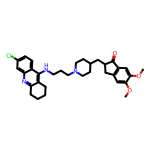

Molecule 4


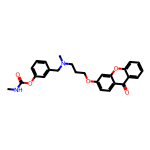

Molecule 5


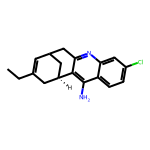

In [ ]:
# Just to explain what is smiles

from rdkit.Chem import Descriptors, rdMolDescriptors, Draw
from tabulate import tabulate
from IPython.display import display
from PIL import Image
import io

valid_data_table = []
images = []

for mol_obj, smiles, label in valid_data[:5]:
    formula = rdMolDescriptors.CalcMolFormula(mol_obj)
    mw = Descriptors.MolWt(mol_obj)
    num_atoms = mol_obj.GetNumAtoms()

    # Create PIL image of molecule
    img = Draw.MolToImage(mol_obj, size=(150,150))
    images.append(img)

    # Add data row without the image (tabulate can’t embed images)
    valid_data_table.append([smiles, label, formula, f"{mw:.2f}", num_atoms])

# Print the table (without images)
print(tabulate(valid_data_table, headers=["SMILES", "Label", "Formula", "Mol. Weight", "Num Atoms"], tablefmt="fancy_grid"))

# Display images separately below the table with labels
print("\nMolecule drawings:")
for i, img in enumerate(images):
    print(f"Molecule {i+1}")
    display(img)

In [ ]:
from sklearn.model_selection import train_test_split

# Split to train and test set by 80-20
smiles_train, smiles_temp, labels_train, labels_temp = train_test_split(
    filtered_smiles_list, filtered_labels, test_size=0.2, train_size=0.8, random_state=42, stratify=filtered_labels
)

# Further split test set to test-validation set to 10-10
smiles_test, smiles_val, labels_test, labels_val = train_test_split(
    smiles_temp, labels_temp, test_size=0.5, random_state=42, stratify=labels_temp
)

Memo: try without stratified later

In [ ]:
def convmol_to_pyg(smiles_list, labels=None):
    featurizer = dc.feat.ConvMolFeaturizer()
    convmols = featurizer.featurize(smiles_list)

    data_list = []

    for idx, convmol in enumerate(convmols):
        if convmol is None:
            continue  # Skip failed molecules

        x = torch.tensor(convmol.get_atom_features(), dtype=torch.float)

        edge_list = []
        for start_idx, neighbors in enumerate(convmol.get_adjacency_list()):
            for end_idx in neighbors:
                edge_list.append((start_idx, end_idx))

        if len(edge_list) > 0:
            edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
        else:
            edge_index = torch.empty((2, 0), dtype=torch.long)  # No bonds

        if labels is not None:
            y = torch.tensor([labels[idx]], dtype=torch.long)
            data = Data(x=x, edge_index=edge_index, y=y, smiles=smiles_list[idx])  # Store SMILES
        else:
            data = Data(x=x, edge_index=edge_index, smiles=smiles_list[idx])  # Store SMILES

        data_list.append(data)

    return data_list

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
train_graphs = convmol_to_pyg(smiles_train, labels_train)
val_graphs   = convmol_to_pyg(smiles_val, labels_val)
test_graphs  = convmol_to_pyg(smiles_test, labels_test)

Streaming output truncated to the last 5000 lines.
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[13:36:45] DEPRECATION WARNING: please use GetValence(getExplicit=False)


# convert the ConvMol outputs into PyG Data objects

From ConvMolFeaturizer:

* nodes (numpy array): shape [num_atoms, num_features]

* edges (list of neighbor indices): adjacency list

Convert into:

* x = tensor(nodes)

* edge_index = tensor(edge list in COO format)

Train, test, val ratio: 80%, 10%, 10%

In [ ]:
print(f"Train graphs: {len(train_graphs)}, Test graphs: {len(test_graphs)}, Validation graphs: {len(val_graphs)}")

# DataLoader
from torch_geometric.loader import DataLoader
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=32)
val_loader = DataLoader(val_graphs, batch_size=32)
print(f"Number of train set batches: {len(train_loader)}, Number of test set batches: {len(test_loader)}, Number of validation set batches: {len(val_loader)}")

Train graphs: 2934, Test graphs: 815, Validation graphs: 326
Number of train set batches: 92, Number of test set batches: 26, Number of validation set batches: 11


# GraphConvModel in PyG, referenced from DeepChem's GraphConvModel

# without uncertainty

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GraphConv, global_mean_pool

class DeepChemStyleGraphConv(nn.Module):
    def __init__(self,
                 node_feat_dim=75,
                 hidden_dims=[64, 64],
                 dense_dim=128,
                 dropout_rate=0.2,
                 n_classes=2,
                 batch_norm=True):
        super(DeepChemStyleGraphConv, self).__init__()

        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList() if batch_norm else None

        # GraphConv layers
        in_channels = node_feat_dim
        for hidden_dim in hidden_dims:
            self.convs.append(GraphConv(in_channels, hidden_dim))
            if batch_norm:
                self.bns.append(nn.BatchNorm1d(hidden_dim))
            in_channels = hidden_dim

        # Dense layers after pooling
        self.fc1 = nn.Linear(in_channels, dense_dim)
        self.fc2 = nn.Linear(dense_dim, n_classes)

        self.dropout_rate = dropout_rate
        self.batch_norm = batch_norm

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if self.batch_norm:
                x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout_rate, training=self.training)

        # Global pooling
        x = global_mean_pool(x, batch)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=self.dropout_rate, training=self.training)
        logits = self.fc2(x)

        return logits

## training

In [ ]:
def train_basic(model, optimizer, criterion, loader, device):
    model.train()
    total_loss = 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(loader.dataset)

## evaluation

In [ ]:
def evaluate_basic(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    for data in loader:
        data = data.to(device)
        with torch.no_grad():
            out = model(data)
            if isinstance(out, tuple):  # Handle uncertainty model
                out = out[0]
            pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
        total += data.num_graphs
    return correct / total

# with uncertainty

In [ ]:
class DeepChemStyleGraphConv_Uncertainty(nn.Module):
    def __init__(self,
                 node_feat_dim=75,
                 hidden_dims=[64, 64],
                 dense_dim=128,
                 dropout_rate=0.2,
                 n_classes=2,
                 batch_norm=True):
        super(DeepChemStyleGraphConv_Uncertainty, self).__init__()

        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList() if batch_norm else None

        in_channels = node_feat_dim
        for hidden_dim in hidden_dims:
            self.convs.append(GraphConv(in_channels, hidden_dim))
            if batch_norm:
                self.bns.append(nn.BatchNorm1d(hidden_dim))
            in_channels = hidden_dim

        self.fc1 = nn.Linear(in_channels, dense_dim)

        # Two outputs: one for classification logits, one for log-variance
        self.fc_logits = nn.Linear(dense_dim, n_classes)
        self.fc_log_var = nn.Linear(dense_dim, 1)  # One uncertainty scalar per graph

        self.dropout_rate = dropout_rate
        self.batch_norm = batch_norm

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if self.batch_norm:
                x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout_rate, training=self.training)

        x = global_mean_pool(x, batch)

        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=self.dropout_rate, training=self.training)

        logits = self.fc_logits(x)
        log_var = self.fc_log_var(x)

        return logits, log_var

DeepChem uses a special loss:

* Penalize mistakes more if uncertainty is low

* Allow bigger mistakes if uncertainty is high

PyTorch version:

In [ ]:
def uncertainty_loss(logits, log_var, labels):
    ce_loss = F.cross_entropy(logits, labels, reduction='none')  # no mean yet
    precision = torch.exp(-log_var.squeeze())  # higher uncertainty → smaller precision
    loss = precision * ce_loss + log_var.squeeze()
    return loss.mean()

## training

In [ ]:
def train_uncertainty(model, optimizer, loader, device):
    model.train()
    total_loss = 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        logits, log_var = model(data)
        loss = uncertainty_loss(logits, log_var, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(loader.dataset)


## evaluation (Accuracy + Optional Variance Output)

In [ ]:
def evaluate_uncertainty(model, loader, device, return_uncertainty=False):
    model.eval()
    correct = 0
    total = 0
    uncertainties = []

    for data in loader:
        data = data.to(device)
        with torch.no_grad():
            logits, log_var = model(data)
            pred = logits.argmax(dim=1)
        correct += (pred == data.y).sum().item()
        total += data.num_graphs
        if return_uncertainty:
            uncertainties.append(log_var.exp().cpu())  # Convert log_var → var

    if return_uncertainty:
        return correct / total, torch.cat(uncertainties, dim=0)
    else:
        return correct / total


# Main

In [ ]:
# Main for Basic Model

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate model
model = DeepChemStyleGraphConv(node_feat_dim=75, n_classes=2).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training
for epoch in range(1, 151):
    loss = train_basic(model, optimizer, nn.CrossEntropyLoss(), train_loader, device)
    acc = evaluate_basic(model, val_loader, device)
    print(f'Epoch {epoch}, Loss: {loss:.4f}, Validation Acc: {acc:.4f}')

Epoch 1, Loss: 0.6221, Validation Acc: 0.7025
Epoch 2, Loss: 0.5766, Validation Acc: 0.7301
Epoch 3, Loss: 0.5490, Validation Acc: 0.7423
Epoch 4, Loss: 0.5368, Validation Acc: 0.7669
Epoch 5, Loss: 0.5313, Validation Acc: 0.7761
Epoch 6, Loss: 0.5275, Validation Acc: 0.7914
Epoch 7, Loss: 0.5035, Validation Acc: 0.7730
Epoch 8, Loss: 0.5014, Validation Acc: 0.7945
Epoch 9, Loss: 0.4963, Validation Acc: 0.8160
Epoch 10, Loss: 0.4884, Validation Acc: 0.7975
Epoch 11, Loss: 0.4823, Validation Acc: 0.7853
Epoch 12, Loss: 0.4662, Validation Acc: 0.7822
Epoch 13, Loss: 0.4761, Validation Acc: 0.7914
Epoch 14, Loss: 0.4629, Validation Acc: 0.7975
Epoch 15, Loss: 0.4722, Validation Acc: 0.7975
Epoch 16, Loss: 0.4576, Validation Acc: 0.7914
Epoch 17, Loss: 0.4476, Validation Acc: 0.7822
Epoch 18, Loss: 0.4552, Validation Acc: 0.8098
Epoch 19, Loss: 0.4432, Validation Acc: 0.8098
Epoch 20, Loss: 0.4510, Validation Acc: 0.8252
Epoch 21, Loss: 0.4378, Validation Acc: 0.8160
Epoch 22, Loss: 0.4414

In [ ]:

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate uncertainty model
model_uncertainty = DeepChemStyleGraphConv_Uncertainty(node_feat_dim=75, n_classes=2).to(device)

optimizer = torch.optim.Adam(model_uncertainty.parameters(), lr=1e-3)

# Training
for epoch in range(1, 151):
    loss = train_uncertainty(model_uncertainty, optimizer, train_loader, device)
    acc = evaluate_basic(model_uncertainty, val_loader, device)
    print(f'Epoch {epoch}, Loss: {loss:.4f}, Validation Acc: {acc:.4f}')


Epoch 1, Loss: 0.5235, Validation Acc: 0.6840
Epoch 2, Loss: 0.4220, Validation Acc: 0.7209
Epoch 3, Loss: 0.3384, Validation Acc: 0.7607
Epoch 4, Loss: 0.2948, Validation Acc: 0.7239
Epoch 5, Loss: 0.1580, Validation Acc: 0.6319
Epoch 6, Loss: 0.2692, Validation Acc: 0.7454
Epoch 7, Loss: 0.5727, Validation Acc: 0.6933
Epoch 8, Loss: 0.4054, Validation Acc: 0.7393
Epoch 9, Loss: 0.2935, Validation Acc: 0.7546
Epoch 10, Loss: 0.2413, Validation Acc: 0.7301
Epoch 11, Loss: 0.1341, Validation Acc: 0.7607
Epoch 12, Loss: 0.1098, Validation Acc: 0.7546
Epoch 13, Loss: 0.1006, Validation Acc: 0.7331
Epoch 14, Loss: 0.3891, Validation Acc: 0.7178
Epoch 15, Loss: 0.0977, Validation Acc: 0.7423
Epoch 16, Loss: 0.0095, Validation Acc: 0.7239
Epoch 17, Loss: 0.1548, Validation Acc: 0.7577
Epoch 18, Loss: -0.1858, Validation Acc: 0.7546
Epoch 19, Loss: -0.0190, Validation Acc: 0.7270
Epoch 20, Loss: 0.1450, Validation Acc: 0.7423
Epoch 21, Loss: 0.0094, Validation Acc: 0.7362
Epoch 22, Loss: -0.0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_with_metrics(model, loader, device, with_uncertainty=False, plot_cm=True):
    model.eval()
    all_preds = []
    all_labels = []
    all_uncertainties = []

    for data in loader:
        data = data.to(device)
        with torch.no_grad():
            if with_uncertainty:
                logits, log_var = model(data)
            else:
                logits = model(data)

            preds = logits.argmax(dim=1)

        all_preds.append(preds.cpu())
        all_labels.append(data.y.cpu())
        if with_uncertainty:
            all_uncertainties.append(log_var.exp().cpu())

    preds = torch.cat(all_preds, dim=0).numpy()
    labels = torch.cat(all_labels, dim=0).numpy()

    # Accuracy
    acc = np.mean(preds == labels)

    # Confusion Matrix
    cm = confusion_matrix(labels, preds)

    # Classification Report
    report = classification_report(labels, preds, output_dict=True)
    report_text = classification_report(labels, preds)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(report_text)

    if plot_cm:
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[str(i) for i in np.unique(labels)],
                    yticklabels=[str(i) for i in np.unique(labels)])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    # If uncertainty requested
    if with_uncertainty:
        uncertainties = torch.cat(all_uncertainties, dim=0).numpy()
        return acc, cm, report, uncertainties
    else:
        return acc, cm, report


Accuracy: 0.8681
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       181
           1       0.85      0.86      0.85       145

    accuracy                           0.87       326
   macro avg       0.87      0.87      0.87       326
weighted avg       0.87      0.87      0.87       326



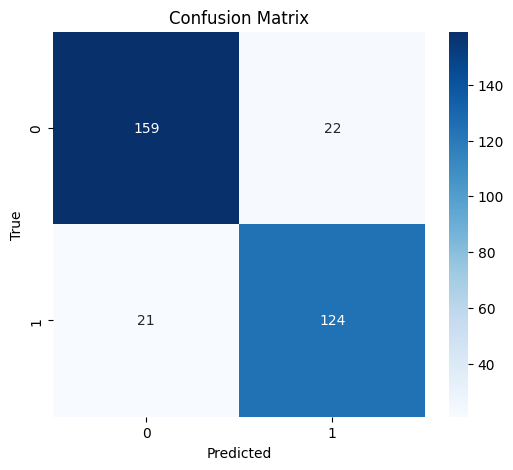

In [ ]:
# for basic model
acc, cm, report = evaluate_with_metrics(model, val_loader, device, with_uncertainty=False)

Accuracy: 0.5552
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.71       181
           1       0.00      0.00      0.00       145

    accuracy                           0.56       326
   macro avg       0.28      0.50      0.36       326
weighted avg       0.31      0.56      0.40       326



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

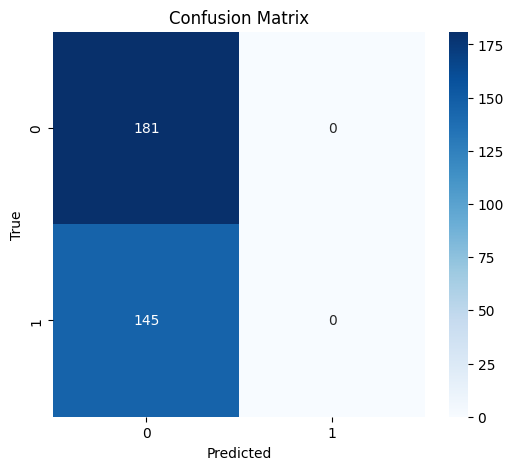

In [ ]:
# for uncertainty model
acc, cm, report, uncertainties = evaluate_with_metrics(model_uncertainty, val_loader, device, with_uncertainty=True)

# Conclusion
## usable model: 'basic model'
* better at catching class 0 examples

# Explainability using XGNN -- instance-level explainability
- to justify "why is it class 0"

In [ ]:
import torch
import torch.nn as nn
from torch_geometric.explain import Explainer, GNNExplainer
from torch_geometric.data import Data

# ----------------------
# 1. Wrap the model
# ----------------------

class WrappedDeepChemGCN(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x, edge_index, batch):
        # Create a dummy Data object because your model expects a full `Data`
        data = Data(x=x, edge_index=edge_index, batch=batch)
        return self.model(data)  # your model expects full Data

# Assume `model` is already trained and ready
wrapped_model = WrappedDeepChemGCN(model)
wrapped_model = wrapped_model.to(device)

# ----------------------
# 2. Setup the Explainer
# ----------------------

explainer = Explainer(
    model=wrapped_model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',  # because we want model-level explanations
    node_mask_type='attributes',  # node features are important
    edge_mask_type='object',      # edges will be masked
    model_config=dict(
        mode='binary_classification',
        task_level='graph',    # graph classification
        return_type='raw',     # your model returns raw logits
    ),
)

# ----------------------
# 3. Choose a graph to explain
# ----------------------

# Example: get first graph from validation loader
example_batch = next(iter(val_loader))
example_data = example_batch.to(device)

# ----------------------
# 4. Generate the explanation
# ----------------------

explanation = explainer(
    x=example_data.x,
    edge_index=example_data.edge_index,
    batch=example_data.batch,   # already correct batch vector
)

# ----------------------
# 5. Now you can visualize / analyze
# ----------------------

print(explanation)  # To see what is inside
# visualization (optional, depends on your installed tools)
# explainer.visualize_subgraph(...)


Explanation(node_mask=[861, 75], edge_mask=[1870], prediction=[32, 2], target=[64], x=[861, 75], edge_index=[2, 1870], batch=[861])


In [ ]:
explanation.node_mask

tensor([[0.1637, 0.0000, 0.0000,  ..., 0.0000, 0.8300, 0.0000],
        [0.0000, 0.0000, 0.7071,  ..., 0.0000, 0.0000, 0.0000],
        [0.1366, 0.0000, 0.0000,  ..., 0.0000, 0.8239, 0.0000],
        ...,
        [0.1865, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2227, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2142, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [ ]:
explanation.edge_mask

tensor([0.1601, 0.1648, 0.1712,  ..., 0.1963, 0.1728, 0.1672], device='cuda:0')

In [ ]:
explanation.prediction

tensor([[ 1.4364e-03,  1.3655e-01],
        [-7.4113e-01,  8.4576e-01],
        [ 9.6755e-01, -9.2884e-01],
        [ 1.5056e+00, -1.4454e+00],
        [-1.4683e+00,  1.8241e+00],
        [-1.2459e+00,  1.5140e+00],
        [-7.0171e-01,  9.3469e-01],
        [-6.1003e-01,  7.5106e-01],
        [-3.4389e-01,  5.1052e-01],
        [ 1.2352e+00, -1.0968e+00],
        [ 3.0451e+00, -2.6195e+00],
        [-7.3506e-01,  9.0855e-01],
        [-8.6951e-02,  3.1485e-01],
        [-1.5481e+00,  1.8561e+00],
        [ 6.4275e-01, -5.9321e-01],
        [ 7.9151e-01, -3.4862e-01],
        [ 4.2071e+00, -4.4375e+00],
        [-2.1248e+00,  2.5246e+00],
        [-8.2723e-01,  1.1058e+00],
        [ 1.8239e+00, -1.9189e+00],
        [ 8.9263e+00, -8.9939e+00],
        [ 1.2817e+00, -1.1927e+00],
        [ 4.7918e+00, -4.9948e+00],
        [-6.8346e-01,  9.7168e-01],
        [-1.0713e+00,  1.4995e+00],
        [-2.0071e+00,  2.3584e+00],
        [-3.0454e+00,  3.7094e+00],
        [ 4.9576e-01, -3.809

In [ ]:
explanation.target

tensor([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1], device='cuda:0')

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import torch

def visualize_subgraph_custom(node_idx, edge_index, edge_mask, y=None, threshold=0.1,
                              node_size=300, edge_width=2, title=None):
    import matplotlib.pyplot as plt
    import networkx as nx
    import numpy as np

    edge_index = edge_index.cpu().numpy()
    edge_mask = edge_mask.cpu().numpy()

    G = nx.Graph()
    for i, (u, v) in enumerate(zip(*edge_index)):
        weight = edge_mask[i]
        if weight > threshold:
            G.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(6, 6))
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue')
    nx.draw_networkx_edges(
        G, pos,
        width=[G[u][v]['weight'] * edge_width for u, v in G.edges()],
        edge_color='gray'
    )
    if y is not None:
        plt.title(f"Subgraph Explanation (Label: {y})")
    elif title:
        plt.title(title)
    else:
        plt.title("Subgraph Explanation")
    plt.axis('off')
    plt.show()



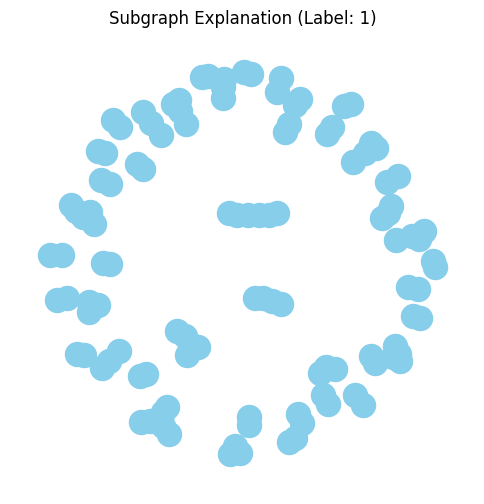

In [ ]:
visualize_subgraph_custom(
    node_idx=None,
    edge_index=explanation.edge_index,
    edge_mask=explanation.edge_mask,
    y=example_data.y[0].item(),
    threshold=0.5
)

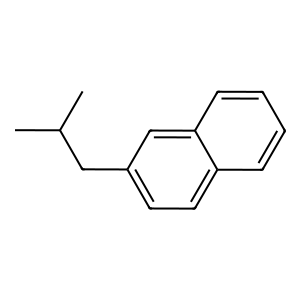

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

def render_molecule(smiles: str):
    # Generate molecule from SMILES string
    mol = Chem.MolFromSmiles(smiles)
    # Generate 2D image of the molecule
    img = Draw.MolToImage(mol)
    return img

# Example molecule (SMILES)
smiles = "CC(C)Cc1ccc2ccccc2c1"  # Example: Ibuprofen
render_molecule(smiles)


In [ ]:
important_edges = explanation.edge_index
edge_mask = explanation.edge_mask

In [ ]:
#backup
def overlay_explanation_on_molecule(mol_img, edge_index, edge_mask, threshold=0.5):
    import matplotlib.pyplot as plt
    import numpy as np

    # Filter edges by importance score (threshold)
    important_edges = edge_index[:, edge_mask >= threshold]

    # Create a figure to overlay the explanation on top of the molecule
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(mol_img)  # Show the original molecule image

    # For each important edge, plot the edge on the molecule image
    for edge in important_edges.T:
        atom_idx_1, atom_idx_2 = edge.cpu().numpy()  # Convert tensor to numpy arrays (move to CPU first)
        ax.plot([atom_idx_1, atom_idx_2], [atom_idx_1, atom_idx_2], 'r-', lw=2)  # Plot the edge
        # Optionally, you can add circles around the highlighted atoms
        ax.scatter([atom_idx_1, atom_idx_2], [atom_idx_1, atom_idx_2], c='red', s=50)

    plt.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import matplotlib.pyplot as plt

def overlay_explanation_on_molecule(mol_img, edge_index, edge_mask, threshold=0.8, mol=None):
    """
    Overlays explanation on a molecule image.

    Args:
        mol_img: the molecule image (can be generated by RDKit’s `MolToImage`)
        edge_index: torch.Tensor with shape [2, num_edges]
        edge_mask: torch.Tensor with shape [num_edges]
        threshold: explanation strength threshold
        mol: RDKit Mol object
    """
    # Convert edge_mask and edge_index to numpy
    edge_index = edge_index.cpu().numpy()
    edge_mask = edge_mask.cpu().detach().numpy()

    # Get atom positions
    conf = mol.GetConformer()
    atom_pos = {i: np.array(conf.GetAtomPosition(i)[:2]) for i in range(mol.GetNumAtoms())}

    # Plot molecule image first
    plt.figure(figsize=(6, 6))
    plt.imshow(mol_img)
    plt.axis('off')

    # Scale coordinates to image size if needed (RDKit returns coordinates in Angstroms)
    # Here we assume the RDKit image is 300x300; you may need to match this with Draw.MolToImage parameters
    width, height = mol_img.size
    min_pos = np.min(list(atom_pos.values()), axis=0)
    max_pos = np.max(list(atom_pos.values()), axis=0)
    scale = np.array([width, height]) / (max_pos - min_pos)

    for i in range(edge_index.shape[1]):
        src, dst = edge_index[:, i]
        importance = edge_mask[i]

        if importance >= threshold:
            pos_src = (atom_pos[src] - min_pos) * scale
            pos_dst = (atom_pos[dst] - min_pos) * scale
            x = [pos_src[0], pos_dst[0]]
            y = [pos_src[1], pos_dst[1]]
            plt.plot(x, y, 'r-', linewidth=2, alpha=importance)

    plt.tight_layout()


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import matplotlib.pyplot as plt
import os
import numpy as np
import torch

def overlay_explanation_on_molecule(mol_img, edge_index, edge_mask, threshold=0.8, mol=None):
    edge_index = edge_index.cpu().numpy()
    edge_mask = edge_mask.cpu().detach().numpy()

    # Ensure molecule has 2D coords for proper visualization
    if mol.GetNumConformers() == 0:
        AllChem.Compute2DCoords(mol)
    conf = mol.GetConformer()
    atom_pos = {i: np.array([conf.GetAtomPosition(i).x, conf.GetAtomPosition(i).y]) for i in range(mol.GetNumAtoms())}

    plt.figure(figsize=(6, 6))
    plt.imshow(mol_img)
    plt.axis('off')

    width, height = mol_img.size  # PIL image size: (width, height)
    min_pos = np.min(list(atom_pos.values()), axis=0)
    max_pos = np.max(list(atom_pos.values()), axis=0)
    scale = np.array([width, height]) / (max_pos - min_pos + 1e-6)  # avoid div by zero

    for i in range(edge_index.shape[1]):
        src, dst = edge_index[:, i]
        importance = edge_mask[i]
        if importance >= threshold:
            pos_src = (atom_pos[src] - min_pos) * scale
            pos_dst = (atom_pos[dst] - min_pos) * scale
            x = [pos_src[0], pos_dst[0]]
            y = [pos_src[1], pos_dst[1]]
            plt.plot(x, y, 'r-', linewidth=2, alpha=importance)

    plt.tight_layout()

def batch_explain_and_save(explainer, graphs, threshold=0.8, folder_path='./explanations/', device='cuda'):
    os.makedirs(folder_path, exist_ok=True)

    for idx, graph in enumerate(graphs):
        graph = graph.to(device)

        # Reset batch for single graph explanation
        graph.batch = torch.zeros(graph.num_nodes, dtype=torch.long).to(device)

        try:
            explanation = explainer(x=graph.x, edge_index=graph.edge_index, batch=graph.batch)

            # Check SMILES attribute existence
            if not hasattr(graph, 'smiles'):
                print(f"[!] Graph {idx} missing 'smiles' attribute, skipping...")
                continue

            mol = Chem.MolFromSmiles(graph.smiles)
            if mol is None:
                print(f"[!] Invalid SMILES for graph {idx}, skipping...")
                continue

            mol_img = Draw.MolToImage(mol, size=(300, 300))

            # Use original graph edge_index for visualization, but edge_mask from explanation
            overlay_explanation_on_molecule(
                mol_img, graph.edge_index, explanation.edge_mask, threshold, mol=mol
            )

            plt.savefig(f"{folder_path}/graph_{idx}_explanation.png")
            plt.close()

        except Exception as e:
            print(f"[!] Skipping graph {idx} due to error: {e}")


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_explain_and_save(explainer, graphs, device=device)

NameError: name 'graphs' is not defined

In [ ]:
!zip explanation.zip './explanations/'

In [ ]:
topk = torch.topk(explanation.node_mask, k=5)
print("Top 5 important node features:", topk)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def test(loader, model, device):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = F.softmax(logits, dim=1)[:, 1]  # probability of class 1
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(data.y.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    try:
        roc_auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        roc_auc = float('nan')

    return acc, precision, recall, f1, roc_auc

In [ ]:
print("Evaluating model on test set...\n")
acc, precision, recall, f1, roc_auc = test(test_loader, model, device)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Evaluating model on test set...



NameError: name 'test' is not defined